In [ ]:
!wget -qnc -P datasets https://raw.githubusercontent.com/Suraj-Patro/Baseball_Data_Analysis/main/datasets/judge.csv
!wget -qnc -P datasets https://raw.githubusercontent.com/Suraj-Patro/Baseball_Data_Analysis/main/datasets/stanton.csv

# Importing modules
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Aaron Judge's Statcast data
judge = pd.read_csv('datasets/judge.csv')

# Load Giancarlo Stanton's Statcast data
stanton = pd.read_csv('datasets/stanton.csv')

**PHẦN CẢI TIẾN: VẬY LIỆU CÓ CÁCH NÀO ĐỂ NGƯỜI NÉM BÓNG ĐÁNH BẠI ĐƯỢC JUDGE VÀ STANTON KHÔNG ?**

Để làm rõ điều này chúng ta sẽ phân tích chỉ số strikeout(chỉ số biểu hiện sự đánh hỏng cả 3 lần liên tiếp của cầu thủ) dựa trên một số các tiêu chí. Nhưng trước hết hãy cùng nhìn lại số lần strikeout của cả 2 cầu thủ từ 2015-2017.

In [ ]:
judge_so = judge.loc[judge.events == 'strikeout']
stanton_so = stanton.loc[stanton.events == 'strikeout']
print("Số lần strikeout của judge:")
print(judge_so.shape[0])
print("Số lần strikeout của stanton:")
print(stanton_so.shape[0])


Số lần strikeout của judge:
249
Số lần strikeout của stanton:
396


**1. PHÂN TÍCH CHỈ SỐ STRIKEOUT DỰA TRÊN VẬN TỐC CỦA NGƯỜI NÉM VÀ ĐỘ XOAY CỦA BÓNG**

Như ở trên, chúng ta thấy stanton đánh hỏng nhiều hơn judge. Giờ hãy cùng nhìn vào sự ảnh hưởng của vận tốc của người ném và độ xoay của bóng ảnh hướng đến sự chính xác của những cú đánh này.

Biểu đồ thứ nhất là các điểm dữ liệu rời rạc. Biểu đồ thứ hai là biểu đồ biểu diễn mật độ dữ liệu.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Se

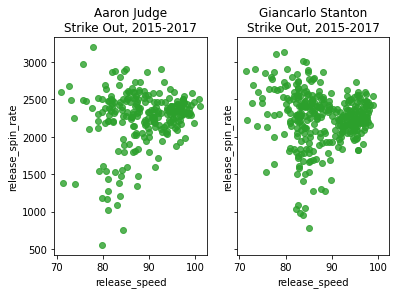

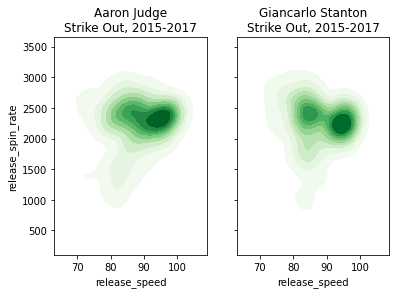

In [45]:
fig11, axs11 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x=judge_so.release_speed, y=judge_so.release_spin_rate, fit_reg=False, color='tab:green', data=judge_so, ax=axs11[0]).set_title('Aaron Judge\nStrike Out, 2015-2017')
sns.regplot(x=stanton_so.release_speed, y=stanton_so.release_spin_rate, fit_reg=False, color='tab:green', data=stanton_so, ax=axs11[1]).set_title('Giancarlo Stanton\nStrike Out, 2015-2017')


fig22, axs22 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_so.release_speed, judge_so.release_spin_rate, cmap="Greens", shade=True, shade_lowest=False, ax=axs22[0]).set_title('Aaron Judge\nStrike Out, 2015-2017')
sns.kdeplot(stanton_so.release_speed, stanton_so.release_spin_rate, cmap="Greens", shade=True, shade_lowest=False, ax=axs22[1]).set_title('Giancarlo Stanton\nStrike Out, 2015-2017');

Có thể thấy rằng cả hai đều đánh hỏng khá nhiều ở vận tốc ném bóng cao, cỡ từ 90 km/h trở lên. Điều này khá hiển hiên so với lẽ thông thường, nhưng khá bất ngờ với những cú ném có độ xoay mạnh thì tỉ lệ đánh hỏng chỉ ở mức kém. Độ xoay lý tưởng là khoảng 2500 vòng/phút.

**2. KHẢO SÁT DỰA VÀO ĐỘ MỞ RỘNG CỦA NGƯỜI NÉM BÓNG**



Đầu tiên hãy tìm hiểu sơ qua về độ mở rộng của người ném.

Độ mở rộng được hiểu là khoảng cách chính xác mà điểm phát bóng của người ném gần với đĩa nhà hơn bao nhiêu. Cụ thể, thông thường, người ném bóng phải bắt đầu chuyển động ném của mình khi đang đứng trên cao su ném bóng - cách mặt sân nhà 60 feet, 6 inch. Điều này không có nghĩa là cú ném thực sự được ném từ độ cao 60 feet, cách đĩa 6 inch. Tùy thuộc vào độ vươn của sải tay mà từng cầu thủ sẽ có thể ném bóng ở khoảng cách gần hơn.

Chúng ta hãy cùng xem nó ảnh hưởng thế nào tới Judge và Stanton qua biểu đồ nén, với các đường lần lượt là giá trị nhỏ nhất,các phân vị 25%,50%,75%,giá trị lớn nhất.

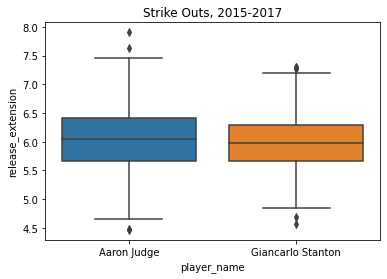

In [38]:
judge_stanton_so = pd.concat([judge_so, stanton_so])

sns.boxplot(x='player_name', y='release_extension', data=judge_stanton_so).set_title('Strike Outs, 2015-2017');

Judge đánh hụt nhiều hơn Stanton khi đối diện với những người có độ mở rộng lớn. Nhưng khá bất ngờ là cả hai chơi khá tốt với những người có độ mở rộng cao, trung bình 2 người đánh hụt với độ mở rộng khoảng 6 feets. Vậy thực sự có phải độ mở rộng càng lớn thì tỷ lệ đánh hụt càng cao không?

Hãy khảo sát thêm 1 lần nữa mối tương quan giữa độ mở rộng và vận tốc ném.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Se

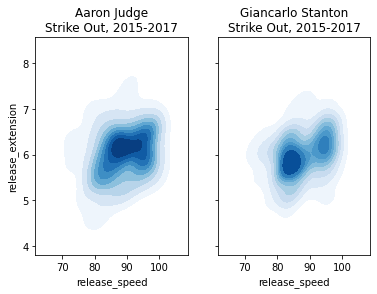

In [39]:
fig33, axs33 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_so.release_speed, judge_so.release_extension, cmap="Blues", shade=True, shade_lowest=False, ax=axs33[0]).set_title('Aaron Judge\nStrike Out, 2015-2017')
sns.kdeplot(stanton_so.release_speed, stanton_so.release_extension, cmap="Blues", shade=True, shade_lowest=False, ax=axs33[1]).set_title('Giancarlo Stanton\nStrike Out, 2015-2017');

Không ngoài kết quả trước, cả hai người hụt nhiều nhất khi đối đầu với cầu thủ ném bóng có độ mở rộng vừa phải, khoảng 6 feet. Judge trượt nhiều hơn, đa số với những cú ném có tốc độ khá cao, khoảng xung quanh 90 km/h. Staton đánh hụt với những cú ném có tốc độ kém hơn một chút, xung quanh 85km/h.

**3. STRIKE OUT BỞI VỊ TRÍ NÉM BÓNG**

Hãy thử khảo sát strikeout thông qua vị trí của cú ném. Vị trí được xác định khi quả bóng bay qua đĩa nhà, theo góc nhìn của người ném bóng. Cụ thể như trong hình dưới đây:

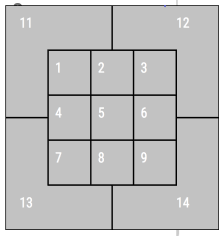

Chúng ta sẽ biểu diễn thông số thông qua biểu đồ 2D. Chúng ta có thể coi mỗi vùng được đánh số là 1 hoặc nhiều ô trong tọa độ 2D. Coi các ô 1-9 là 1 ô có tọa độ từ (2,4)(tọa độ zone 1) đến (4,2)(zone 9), các zone 11-14 sẽ gồm 4 ô với mỗi zone, cụ thể trong hình vẽ:

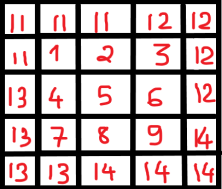

Bắt đầu với các zone được đánh số từ 1 đến 9, ta có hàm chuyển zone sang tọa độ 2D như sau:


In [40]:
def assign_x_coordd(row):
    if row.zone in [ 1,4, 7]:
        return 2
    if row.zone in [2, 5, 8]:
        return 3
    if row.zone in [3, 6, 9]:
        return 4
    

def assign_y_coordd(row):
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 4
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 3
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 2

Các zone nằm ở vùng ngoài mỗi zone sẽ gồm 4 ô. Chúng ta sẽ xây dựng 4 hàm chuyển:

Hàm 1: Chuyển tọa độ các ô (1,5),(4,5),(1,1),(4,1) lần lượt của 11,12,13,14

Hàm 2: Chuyển tọa độ các ô (1,4),(5,5),(1,2),(5,2) lần lượt của 11,12,13,14

Hàm 3: Chuyển tọa độ các ô (2,5),(5,4),(2,1),(5,1) lần lượt của 11,12,13,14

Hàm 4: Chuyển tọa độ các ô (3,5),(5,3),(1,3),(3,1) lần lượt của 11,12,13,14

In [ ]:
def assign_boarderx_1(row):
  if row.zone in [11,13]:
    return 1
  return 4
def assign_boardery_1(row):
  if row.zone in [11,12]:
    return 5
  return 1

def assign_boarderx_2(row):
  if row.zone in [11,13]:
    return 1
  return 5
def assign_boardery_2(row):
  if row.zone in [13,14]:
    return 2
  if row.zone == 11:
    return 4
  return 5

def assign_boarderx_3(row):
  if row.zone in [11,13]:
    return 2
  return 5
def assign_boardery_3(row):
  if row.zone == 11:
    return 5
  if row.zone == 12:
    return 4
  return 1


def assign_boarderx_4(row):
  if row.zone == 11:
    return 3
  if row.zone == 13:
    return 1
  if row.zone == 12:
    return 5
  return 3
def assign_boardery_4(row):
  if row.zone == 11:
    return 5
  if row.zone in [12,13]:
    return 3
  return 1

  

Khảo sát streakout của Judge theo vị trí cú ném.

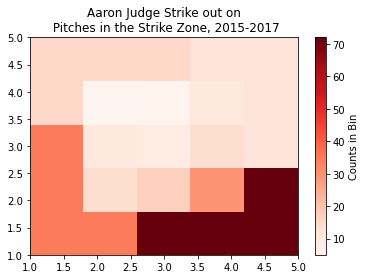

In [44]:
judge_strike_so_br = []
for i in range(4):
  judge_strike_so_br.append(judge_so.copy().loc[judge_so.zone >= 11])

judge_strike_so_br[0]['zone_x'] = judge_strike_so_br[0].apply(assign_boarderx_1,axis = 1)
judge_strike_so_br[0]['zone_y'] = judge_strike_so_br[0].apply(assign_boardery_1,axis = 1)

judge_strike_so_br[1]['zone_x'] = judge_strike_so_br[1].apply(assign_boarderx_2,axis = 1)
judge_strike_so_br[1]['zone_y'] = judge_strike_so_br[1].apply(assign_boardery_2,axis = 1)

judge_strike_so_br[2]['zone_x'] = judge_strike_so_br[2].apply(assign_boarderx_3,axis = 1)
judge_strike_so_br[2]['zone_y'] = judge_strike_so_br[2].apply(assign_boardery_3,axis = 1)

judge_strike_so_br[3]['zone_x'] = judge_strike_so_br[3].apply(assign_boarderx_4,axis = 1)
judge_strike_so_br[3]['zone_y'] = judge_strike_so_br[3].apply(assign_boardery_4,axis = 1)

judge_strike_so = judge_so.copy().loc[judge_so.zone <= 9]
judge_strike_so['zone_x'] = judge_strike_so.apply(assign_x_coordd, axis=1)
judge_strike_so['zone_y'] = judge_strike_so.apply(assign_y_coordd, axis=1)
z = pd.concat([judge_strike_so_br[0],judge_strike_so_br[1],judge_strike_so_br[2],judge_strike_so_br[3],judge_strike_so])
# Plot Judge's home run zone as a 2D histogram with a colorbar
plt.hist2d(x=z.zone_x, y=z.zone_y, bins = 5, cmap='Reds')
plt.title('Aaron Judge Strike out on\n Pitches in the Strike Zone, 2015-2017')

cb = plt.colorbar()
cb.set_label('Counts in Bin')

Khảo sát của Stanton theo vị trí cú ném.

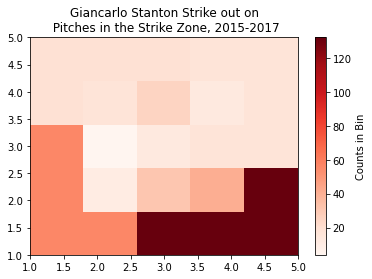

In [43]:


stanton_strike_so_br = []
for i in range(4):
  stanton_strike_so_br.append(stanton_so.copy().loc[stanton_so.zone >= 11])

stanton_strike_so_br[0]['zone_x'] = stanton_strike_so_br[0].apply(assign_boarderx_1,axis = 1)
stanton_strike_so_br[0]['zone_y'] = stanton_strike_so_br[0].apply(assign_boardery_1,axis = 1)

stanton_strike_so_br[1]['zone_x'] = stanton_strike_so_br[1].apply(assign_boarderx_2,axis = 1)
stanton_strike_so_br[1]['zone_y'] = stanton_strike_so_br[1].apply(assign_boardery_2,axis = 1)

stanton_strike_so_br[2]['zone_x'] = stanton_strike_so_br[2].apply(assign_boarderx_3,axis = 1)
stanton_strike_so_br[2]['zone_y'] = stanton_strike_so_br[2].apply(assign_boardery_3,axis = 1)

stanton_strike_so_br[3]['zone_x'] = stanton_strike_so_br[3].apply(assign_boarderx_4,axis = 1)
stanton_strike_so_br[3]['zone_y'] = stanton_strike_so_br[3].apply(assign_boardery_4,axis = 1)

stanton_strike_so = stanton_so.copy().loc[stanton_so.zone <= 9]
stanton_strike_so['zone_x'] = stanton_strike_so.apply(assign_x_coordd, axis=1)
stanton_strike_so['zone_y'] = stanton_strike_so.apply(assign_y_coordd, axis=1)
z = pd.concat([stanton_strike_so_br[0],stanton_strike_so_br[1],stanton_strike_so_br[2],stanton_strike_so_br[3],stanton_strike_so])
# Plot Judge's home run zone as a 2D histogram with a colorbar
plt.hist2d(x=z.zone_x, y=z.zone_y, bins = 5, cmap='Reds')
plt.title('Giancarlo Stanton Strike out on\n Pitches in the Strike Zone, 2015-2017')

cb = plt.colorbar()
cb.set_label('Counts in Bin')

Nhìn chung điểm yếu của cả 2 người đều là những cú ném thấp, đặc biệt là về góc phải dưới. Staton ít hỏng những cú đánh tầm cao, trong khi đó Judge lại hay hụt hơn.

**4. KẾT LUẬN**

Để đánh bại được Judge và Stanton, người ném cần tập trung vào 1 số biểu hiện sau đây:
1. Không yêu cầu độ mở rộng quá lớn, chỉ cần ở mức trung bình.
2. Bóng ném không cần quá xoáy nhưng tốc độ phải ở mức lớn từ 85km/h->90km/h.
3. Tập trung vào những cú ném thấp, đặc biệt nhắm vào vị trí strikezone 14